<a href="https://colab.research.google.com/github/limlimlim99/limjihyeonjjang/blob/main/%ED%86%B5%EA%B3%84/OpenCV02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### OpenCV
- Open Source Computer Vision Library는 오픈소스 이미지(동영상) 라이브러리
- 이미지 형식 변환, 필터 처리, 얼굴 인식, 물체 인식, 문자 인식 등 이미지와 관련된 다양한 처리
- 머신러닝에서 OpenCV 사용 : 머신러닝의 입력으로 전달하려면 이미지를 숫자 배열 데이터로 변경
- pip install opencv-python


In [ ]:
!pwd

/content


In [ ]:
%cd /content

/content


## 다운로드 이미지 출력하기

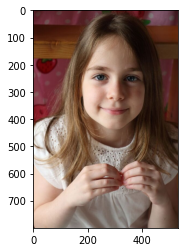

True

In [ ]:
## 다운로드 이미지 출력하기

filepath = '/content/drive/MyDrive/통계/자료/girl.png'
img = cv2.imread(filepath)

plt.imshow(img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
# plt.axis('off') # axis 출력끄기
# OpenCV BGR 인 반면 matplotlib RGB 순서
plt.show()

#이미지 저장
cv2.imwrite('/content/drive/MyDrive/통계/자료/girl1.png', img)

(800, 533, 3)


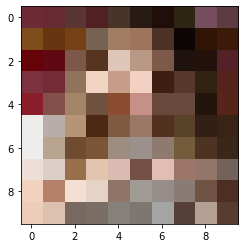

In [ ]:
import matplotlib.pyplot as plt
import cv2

# 이미지 읽어 들이기
filepath = '/content/drive/MyDrive/통계/자료/girl1.png'
img = cv2.imread(filepath)
print(img.shape)
# plt.axis('off')

# 이미지 크기 변경하기
#im2 = cv2.resize(img, (600,300)) # img, (width, height)   #이미지 늘리기
im2 = cv2.resize(img, (10,10)) # img, (width, height)   #모자이크 하기


# 크기 변경한 이미지 저장하기
cv2.imwrite('/content/drive/MyDrive/통계/자료/girl2.png', im2)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im2,cv2.COLOR_BGR2RGB))
plt.show()


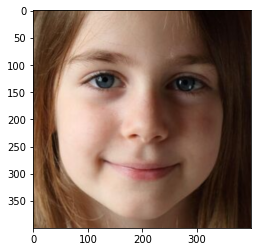

In [ ]:
# 이미지 읽기
filepath = '/content/drive/MyDrive/통계/자료/girl1.png'
img = cv2.imread(filepath)

# 이미지 자르기
im3 = img[150:450, 150:450]

# 이미지 크기 변경하기
im3 = cv2.resize(im3,(400,400))

# 크기 변경한 이미지 저장하기
cv2.imwrite('/content/drive/MyDrive/통계/자료/cut_resize.png',im3)

# 이미지 출력하기
plt.imshow(cv2.cvtColor(im3,cv2.COLOR_BGR2RGB))
plt.show()


#### 얼굴 검출 - 자동으로 얼굴에 모자이크 처리
- 인간의 얼굴이 어디 있는지 검출
- 사람의 얼굴을 검출하고 자동으로 모자이크 처리\
사생활 보호를 위해 관계없는 사람의 얼굴 자동으로 모자이크 처리\
얼굴 인식을 사용해 사람 얼굴이 있는 사진을 자동으로 수집


[얼굴 검출 캐스케이드-얼굴 요소 데이터베이스]https://github.com/opencv/opencv/tree/master/data/haarcascades

In [ ]:
# cascadeclassifier 은 분류기(검출기)
# 정면얼굴만 검출 가능=>frontalface

# len(face_list) == 0이면 없다는 것임

얼굴의 좌표 = 149 127 316 316


<function matplotlib.pyplot.show(*args, **kw)>

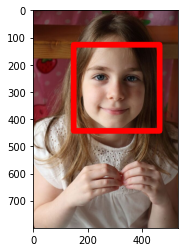

In [ ]:
# 캐스케이드 파일 지정해서 검출기 생성하기
# OpenCV는 Haar-like 특징 학습기라고 부르는 머신러닝을 사용해 얼굴 인식
# 캐스케이드 파일(얼굴 요소 DB)를 사용해 눈, 코, 잎과 같은 요소의 위치 관계를 확인하고 얼굴인지 확인
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# 얼굴 검출 전용 캐스케이드 파일 외 정면 얼굴, 웃는 얼굴, 눈, 몸 전체를 검출하는 다양한 캐스케이드 파일
cascade_file = "/content/drive/MyDrive/통계/자료/haarcascade_frontalface_alt.xml" # 정면 얼굴
cascade = cv2.CascadeClassifier(cascade_file) # 검출기는 캐스캐이드 파일을 지정해 다양한 물체 검출

# 이미지를 읽어 들이고 그레이스케일로 변환하기
# 밝은 부분은 흰색, 어두운 부분은 검은색. 코는 밝은 부분, 코의 양옆은 어두운 부분
# 얼굴 영역중에 중앙에 밝은 부분이 있다면 얼굴로 판단. 각 요소의 명암패턴을 결합해 얼굴의 형태 확인
filepath = '/content/drive/MyDrive/통계/자료/girl.png'
img = cv2.imread(filepath)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# 얼굴 인식하기 (cascade.detectMultiScale()메서드 사용)

face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))

# 결과 확인하기
if len(face_list) == 0:
  print("얼굴인식 실패")
  quit()

# 인식한 부분 표시하기
for (x,y,w,h) in face_list:
  print("얼굴의 좌표 =", x,y,w,h)
  red = (0,0,255)
  cv2.rectangle(img, (x,y), (x+w, y+h),red, thickness=20)

# 이미지 출력하기
cv2.imwrite("/content/drive/MyDrive/통계/자료/face-detect.png",img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

# 모자이크 하기

In [ ]:
# 모자이크 하기
# mosaic.py
import cv2

def mosaic(img, rect, size):  #(이미지, 모자이크할모양(크기), 모자이크할 사이즈(정도))
  # 모자이크 적용할 부분 추출하기
  (x1, y1, x2, y2) = rect
  w = x2 - x1
  h = y2 - y1
  i_rect = img[y1:y2, x1:x2]

  # 축소하고 확대하기
  i_small = cv2.resize(i_rect, (size, size))
  i_mos = cv2.resize(i_small, (w,h), interpolation=cv2.INTER_AREA)   #보간법

  # 모자이크 적용하기
  img2 = img.copy()
  img2[y1:y2, x1:x2] = i_mos
  return img2

In [ ]:
# 모듈업로드
!cp /content/drive/MyDrive/통계/자료/mosaic.py /content

In [ ]:
!ls

drive  mosaic.py  __pycache__  sample_data


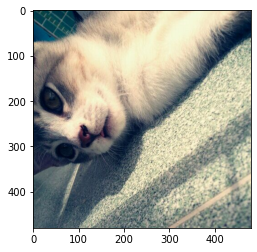

In [ ]:
img = cv2.imread('/content/drive/MyDrive/통계/자료/cat.png')
# 이미지 출력하기
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

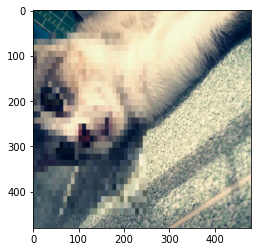

In [ ]:
# 위의 mosaic를 mosaic 이름으로 모듈을 임포트
import cv2
from mosaic import mosaic as mosaic

# 이미지를 읽어들이고 모자이크 처리하기
img = cv2.imread('/content/drive/MyDrive/통계/자료/cat.png')
# 이미지, 모자이크할 부분의 좌표, 모자이크의 정도
mos = mosaic(img, (0,50,250,450), 30)

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/통계/자료/cat-mosaic.png', mos)
plt.imshow(cv2.cvtColor(mos,cv2.COLOR_BGR2RGB))
plt.show()

# 사람 얼굴에 자동으로 모자이크 처리하기

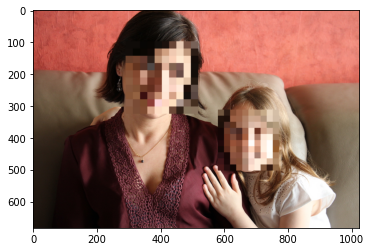

In [ ]:
# 사람 얼굴에 자동으로 모자이크 처리하기
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = '/content/drive/MyDrive/통계/자료/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이 스케일로 변환하기
img2 = cv2.imread('/content/drive/MyDrive/통계/자료/family.jpg')
img_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
  img2 = mosaic(img2, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/통계/자료/family-mosaic.png', img2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

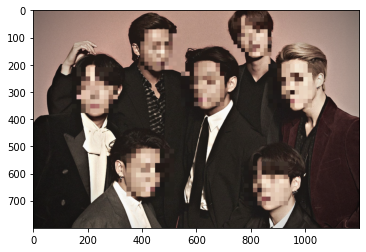

In [ ]:
# 연습1

# 사람 얼굴에 자동으로 모자이크 처리하기
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = '/content/drive/MyDrive/통계/자료/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이 스케일로 변환하기
img3 = cv2.imread('/content/drive/MyDrive/통계/자료/EOKA7NCX6REIHICYCTR53H2ORA.png')
img_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기
face_list = cascade.detectMultiScale(img_gray, minSize=(100,100))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
  img3 = mosaic(img3, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/통계/자료/EOKA7NCX6REIHICYCTR53H2ORA.png-mosaic.png', img3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

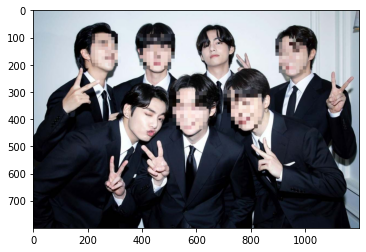

In [ ]:
# 연습2

# 사람 얼굴에 자동으로 모자이크 처리하기
import matplotlib.pyplot as plt
import cv2
from mosaic import mosaic as mosaic

# 캐스케이드 파일 지정해서 검출기 생성하기
cascade_file = '/content/drive/MyDrive/통계/자료/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)

# 이미지를 읽어 들이고 그레이 스케일로 변환하기
img3 = cv2.imread('/content/drive/MyDrive/통계/자료/bts_img.jpg')
img_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

# 얼굴 검출하기
face_list = cascade.detectMultiScale(img_gray, minSize=(10,10))
if len(face_list) == 0: quit()

# 인식한 부분에 모자이크 처리하기
for (x,y,w,h) in face_list:
  img3 = mosaic(img3, (x, y, x+w, y+h), 10)

# 이미지 출력하기
cv2.imwrite('/content/drive/MyDrive/통계/자료/bts_img-mosaic.png', img3)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

# 얼굴의 각도 바꿔보기

---0---
얼굴의 좌표 = 135 109 352 352
---10---
얼굴의 좌표 = 174 149 350 350
---20---
얼굴의 좌표 = 198 177 362 362
---30---
---40---
---50---
---60---
---70---
---80---


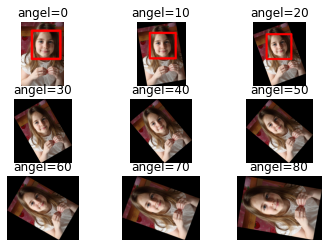

In [ ]:
# OpenCV의 얼굴 검출은 옆모습과 기울어진 얼굴을 잘 검출 못함
import matplotlib.pyplot as plt
import cv2
from scipy import ndimage

# 검출기 생성하고 이미지 읽어들이기 
cascade_file = '/content/drive/MyDrive/통계/자료/haarcascade_frontalface_alt.xml'
cascade = cv2.CascadeClassifier(cascade_file)
img = cv2.imread('/content/drive/MyDrive/통계/자료/girl.png')

# 얼굴 검출하고 영역 표시하기
def face_detec(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  face_list = cascade.detectMultiScale(img_gray, minSize=(300,300))
  # 인식할 부분 표시하기
  for (x,y,w,h) in face_list:
    print("얼굴의 좌표 =", x,y,w,h)
    red = (0, 0, 255)
    cv2.rectangle(img, (x, y), (x+w, y+h), red, thickness=30)

# 여러 각도의 이미지를 만들고 테스트하기
for i in range(0,9):
  ang = i *10
  print("---" + str(ang) + "---")
  img_r = ndimage.rotate(img, ang)
  face_detec(img_r)
  plt.subplot(3, 3, i+1)
  plt.axis("off")
  plt.title("angel=" + str(ang))
  plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

plt.show()
